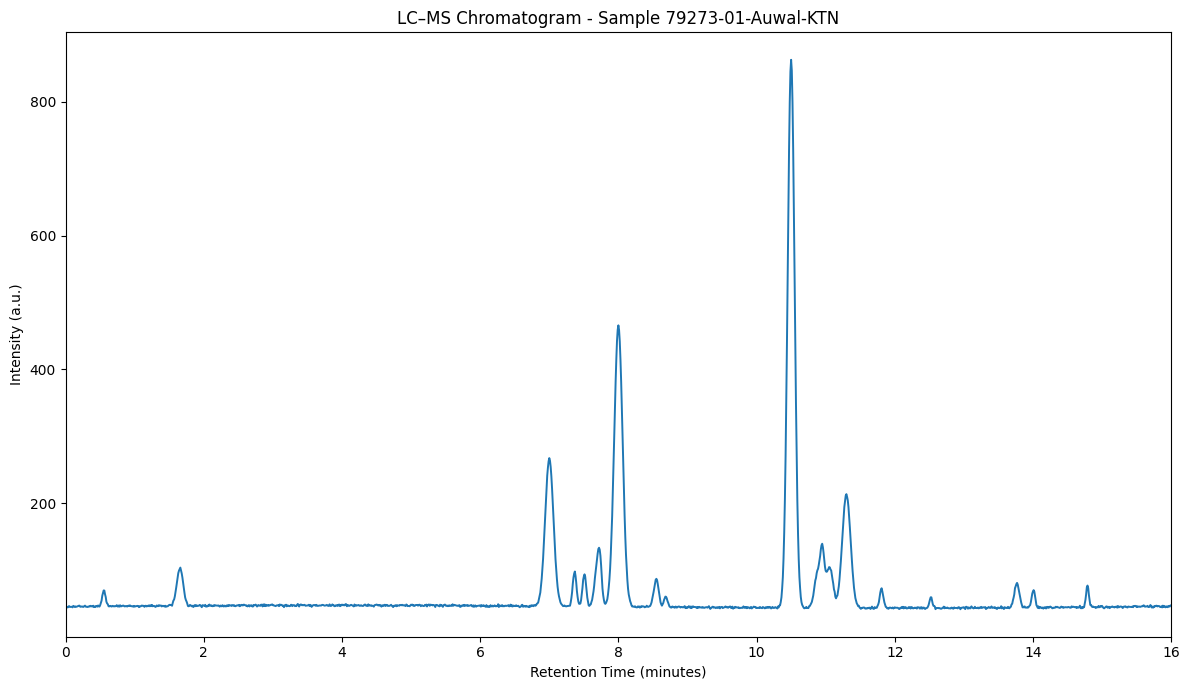

'# Also dump a table of all simulated peaks for reference\nall_peaks = [(rt, sigma, amp, "major") for rt, sigma, amp in major_peaks] +             [(rt, sigma, amp, "minor") for rt, sigma, amp in small_peaks]\npeaks_df = pd.DataFrame(all_peaks, columns=["RT_min", "Sigma_min", "Height_a.u.", "Type"])\npeaks_csv_path = "/mnt/data/lcms_all_simulated_peaks.csv"\npeaks_df.to_csv(peaks_csv_path, index=False)\n\npng_path, csv_path, peaks_csv_path'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Time axis
t = np.arange(0.0, 16.0, 0.01)

# Gaussian helper
def gaussian(x, mu, sigma, amp):
    return amp * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Major peaks: (RT, width[sigma in min], height)
major_peaks = [
    (7.0, 0.06, 220),   # Citrinin
    (8.0, 0.06, 420),   # Ochratoxin A 
    (10.5, 0.05, 820),  # Gliotoxin 
    (11.3, 0.06, 170)   # 2-Phenylethanol 
]

# Build major signal
signal = np.zeros_like(t)
for rt, sigma, amp in major_peaks:
    signal += gaussian(t, rt, sigma, amp)

# Add smaller random peaks "in between" the others
rng = np.random.default_rng(123)
small_peaks = []

# define windows between major peaks (0-1st, between each, last-end)
rt_list = [0.0] + [p[0] for p in major_peaks] + [16.0]
windows = [(rt_list[i], rt_list[i+1]) for i in range(len(rt_list)-1)]

for (start, end) in windows:
    # skip very tiny windows near major peaks boundaries
    if end - start < 0.6:
        continue
    # number of small peaks in this window
    n_peaks = rng.integers(2, 6)  # 2–5 small peaks per window
    # pick RTs avoiding being too close to major peaks
    rts = rng.uniform(start + 0.2, end - 0.2, size=n_peaks)
    rts.sort()
    for rt in rts:
        sigma = rng.uniform(0.02, 0.05)
        amp = rng.uniform(15, 60)  # small amplitude
        small_peaks.append((rt, sigma, amp))
        signal += gaussian(t, rt, sigma, amp)

# Baseline + gentle drift + noise
baseline = 45 + 2.0 * np.sin(0.4 * t)
noise = rng.normal(0, 0.8, size=t.shape)
intensity = np.clip(baseline + signal + noise, 0, None)

# Save data
df = pd.DataFrame({"Time_min": t, "Intensity_a.u.": intensity})



# Plot (single plot, default style, no explicit colors)
plt.figure(figsize=(12, 7))
plt.plot(t, intensity, linewidth=1.4)
plt.title("LC–MS Chromatogram - Sample 79273-01-Auwal-KTN")
plt.xlabel("Retention Time (minutes)")
plt.ylabel("Intensity (a.u.)")
plt.xlim(0, 16)
plt.tight_layout()

plt.show()

"""# Also dump a table of all simulated peaks for reference
all_peaks = [(rt, sigma, amp, "major") for rt, sigma, amp in major_peaks] + \
            [(rt, sigma, amp, "minor") for rt, sigma, amp in small_peaks]
peaks_df = pd.DataFrame(all_peaks, columns=["RT_min", "Sigma_min", "Height_a.u.", "Type"])
peaks_csv_path = "/mnt/data/lcms_all_simulated_peaks.csv"
peaks_df.to_csv(peaks_csv_path, index=False)

png_path, csv_path, peaks_csv_path"""


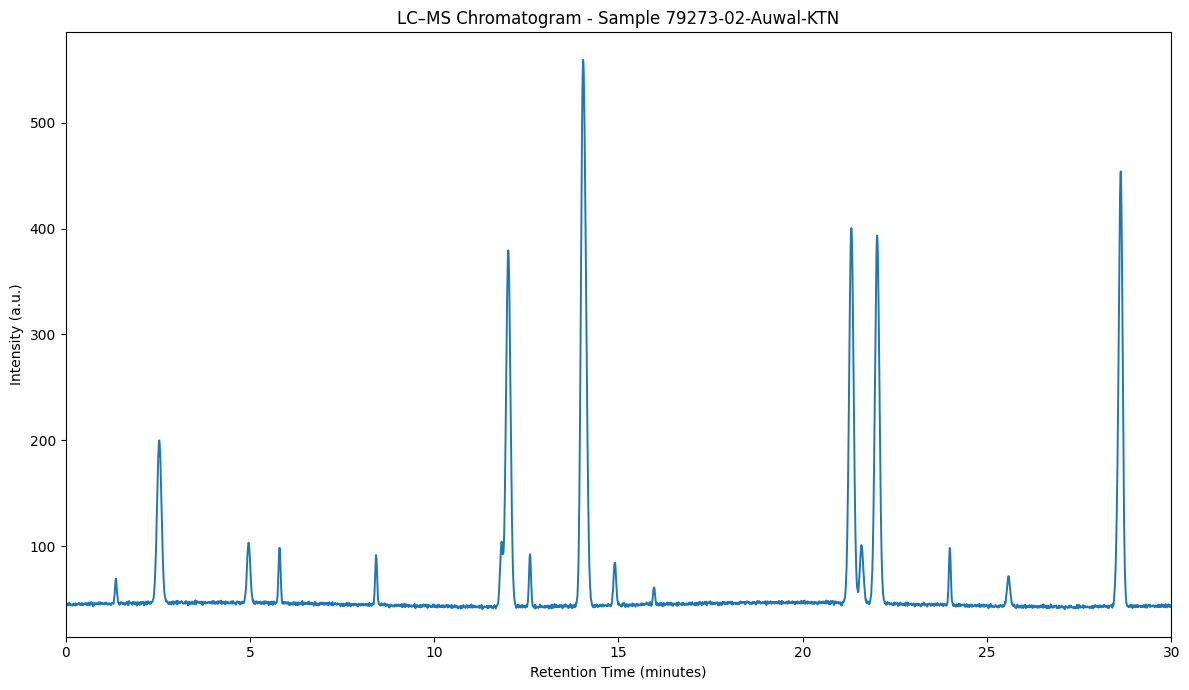

In [6]:
# Fixed: extend the x-axis to 30 minutes (it was previously limited to 16)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Time axis
t = np.arange(0.0, 30.0, 0.01)

# Gaussian helper
def gaussian(x, mu, sigma, amp):
    return amp * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Major peaks: (RT, width[sigma in min], height)
major_peaks = [
    (22.02, 0.06, 347),   
    (2.54, 0.06, 153),   
    (14.02, 0.05, 331),  
    (12.01, 0.06, 335), 
    (28.63, 0.05, 404),
    (21.32, 0.06, 354),
    (14.09, 0.06, 295)
]

# Build major signal
signal = np.zeros_like(t)
for rt, sigma, amp in major_peaks:
    signal += gaussian(t, rt, sigma, amp)

# Add smaller random peaks "in between" the others
rng = np.random.default_rng(123)
small_peaks = []

# define windows between major peaks (0-1st, between each, last-end)
rt_list = [0.0] + [p[0] for p in major_peaks] + [30.0]
windows = [(rt_list[i], rt_list[i+1]) for i in range(len(rt_list)-1)]

for (start, end) in windows:
    if end - start < 0.6:
        continue
    n_peaks = rng.integers(2, 6)  # 2–5 small peaks per window
    rts = rng.uniform(start + 0.2, end - 0.2, size=n_peaks)
    rts.sort()
    for rt in rts:
        sigma = rng.uniform(0.02, 0.05)
        amp = rng.uniform(15, 60)  # small amplitude
        small_peaks.append((rt, sigma, amp))
        signal += gaussian(t, rt, sigma, amp)

# Baseline + gentle drift + noise
baseline = 45 + 2.0 * np.sin(0.4 * t)
noise = rng.normal(0, 0.8, size=t.shape)
intensity = np.clip(baseline + signal + noise, 0, None)

# Save data
df = pd.DataFrame({"Time_min": t, "Intensity_a.u.": intensity})

# Plot (single plot, default style, no explicit colors)
plt.figure(figsize=(12, 7))
plt.plot(t, intensity, linewidth=1.4)
plt.title("LC–MS Chromatogram - Sample 79273-02-Auwal-KTN")
plt.xlabel("Retention Time (minutes)")
plt.ylabel("Intensity (a.u.)")
plt.xlim(0, 30)  # <-- extended to 30 minutes
plt.tight_layout()
plt.show()
